# Script to check the setting of ROIs on Ioxos PBPS
### Purpose:
To record the noise for different ROI windows on Ioxos PBPS (currently only PBPS133 Bernina)
Contact christopher.arrell@psi.ch

In [2]:
import epics as ep
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
from bsread import source
from IPython.display import clear_output, display
%matplotlib inline

## Setup and functions setup

In [3]:
channels = ['SLAAR21-LSCP1-FNS:CH4:VAL_GET','SLAAR21-LSCP1-FNS:CH5:VAL_GET','SLAAR21-LSCP1-FNS:CH6:VAL_GET','SLAAR21-LSCP1-FNS:CH7:VAL_GET']

sig_bstart = ['SLAAR21-LSCP1-FNS:CH4:BSTART','SLAAR21-LSCP1-FNS:CH5:BSTART','SLAAR21-LSCP1-FNS:CH6:BSTART','SLAAR21-LSCP1-FNS:CH7:BSTART']
sig_bend = ['SLAAR21-LSCP1-FNS:CH4:BEND','SLAAR21-LSCP1-FNS:CH5:BEND','SLAAR21-LSCP1-FNS:CH6:BEND','SLAAR21-LSCP1-FNS:CH7:BEND']
sig_start = ['SLAAR21-LSCP1-FNS:CH4:START','SLAAR21-LSCP1-FNS:CH5:START','SLAAR21-LSCP1-FNS:CH6:START','SLAAR21-LSCP1-FNS:CH7:START']
sig_end = ['SLAAR21-LSCP1-FNS:CH4:END','SLAAR21-LSCP1-FNS:CH5:END','SLAAR21-LSCP1-FNS:CH6:END','SLAAR21-LSCP1-FNS:CH7:END']

def write_PV(names,val):
    for name in names:
        ep.caput(name,val)
def get_correlation(channels,numShots):
    with source(channels=channels) as stream:
        d_r = []
        d_l = []
        d_d = []
        d_u = []
        for i in range(0,numShots):
            message = stream.receive()
            d_r.append(message.data.data[channels[0]].value)
            d_l.append(message.data.data[channels[1]].value)
            d_d.append(message.data.data[channels[2]].value)
            d_u.append(message.data.data[channels[3]].value)
        return((np.corrcoef((np.asarray(d_r)+np.asarray(d_l))/2, (np.asarray(d_u)+np.asarray(d_d))/2))[1][0])

In [21]:
write_PV(sig_start,240)

## User inputs

In [22]:
numShots = 1000
scan_range = np.arange(240,300,1)

## Scan and measure

In [23]:
correlation = []
for step in scan_range:
    write_PV(sig_end,step)
    sleep(1)
    try:
        correlation.append(get_correlation(channels, numShots))
    except:
        correlation.append(np.nan)
    clear_output(wait=True)
correlation = np.asarray(correlation)

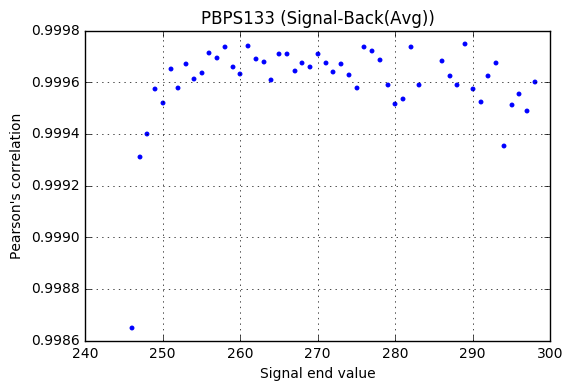

In [27]:
plt.figure()
plt.plot(scan_range[6:-1], correlation[6:-1],'.')
plt.ylabel('Pearson\'s correlation')
plt.xlabel('Signal end value')
plt.title("PBPS133 (Signal-Back(Avg))")
plt.grid(True)